# Introduction

### Over the years, fossil fuels have played significant roles in supplying energy for heating and power generation to the human population. Various factors, including global demand, government policies, economic considerations, and technological advancements, have influenced energy availability. In this analysis, I employ an up-to-date dataset concerning futures related to major fossil fuels to offer the following:

### Trend Analysis and Market Dynamics: analyze and scrutinize price fluctuation patterns to predict future market trends in the energy industry.
### Trading and Investment Strategies: utilize the dataset to test trading and investment strategies based on energy fuel dynamics.
### Risk Management: provide insights into hedging and managing portfolio risks.

### The dataset comprises 8 columns for the combined data, whereas the individual data contains 6 columns.

### Column Descriptions:

#### 1. Date: Trading Days from 2000 to 2023. Format: YYYY-MM-DD.
#### 2. Open: Market's opening price for the day.
#### 3. High: Peak price during the trading window.
#### 4. Low: Lowest traded price during the day.
#### 5. Close: End of day(EOD) prices.
#### 6. Volume: The quantity of contracts traded during the trading period.
#### 7. Ticker: The unique market quotation symbol for the commodity.
#### 8. Commodity: Indicates the type of fuel to which the future contract is related, such as crude oil or natural gas.


# Import the libraries

In [125]:
## libraries Import

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## pd.options.mode.chained_assignment = None

# Load and inspect the data

## Load the data

In [409]:
all_fuels = pd.read_csv("all_fuels_data.csv")   ## Combined dataset for all commodities
brent_oil = pd.read_csv("Brent_Crude_Oil_data.csv", index_col = "date")
crude_oil = pd.read_csv("Crude_Oil_data.csv", index_col = "date")
heating_oil = pd.read_csv("Heating_Oil_data.csv", index_col = "date")
natural_gas = pd.read_csv("Natural_Gas_data.csv", index_col = "date")
rbob_gasoline = pd.read_csv("RBOB_Gasoline_data.csv", index_col = "date")

## Inspect the data
### Inspect the data frame to check missing values

In [410]:
all_fuels.head()   

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


In [128]:
all_fuels.info()    ## No missing value (NaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27200 entries, 0 to 27199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     27200 non-null  object 
 1   commodity  27200 non-null  object 
 2   date       27200 non-null  object 
 3   open       27200 non-null  float64
 4   high       27200 non-null  float64
 5   low        27200 non-null  float64
 6   close      27200 non-null  float64
 7   volume     27200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [411]:
# Another way
# Let's loop through the data and see if there is anything missing

for col in all_fuels.columns:
    pct_missing = np.mean(all_fuels[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ticker - 0%
commodity - 0%
date - 0%
open - 0%
high - 0%
low - 0%
close - 0%
volume - 0%


### No missing data in the combined all_fuels data set

In [129]:
brent_oil.info()  ## No missing value (NaN)

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 2007-07-30 to 2023-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4021 non-null   float64
 1   high    4021 non-null   float64
 2   low     4021 non-null   float64
 3   close   4021 non-null   float64
 4   volume  4021 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 188.5+ KB


In [130]:
crude_oil.info() ## No missing value (NaN)

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 2000-08-23 to 2023-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5809 non-null   float64
 1   high    5809 non-null   float64
 2   low     5809 non-null   float64
 3   close   5809 non-null   float64
 4   volume  5809 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 272.3+ KB


In [131]:
heating_oil.info()  ## No missing value (NaN)

<class 'pandas.core.frame.DataFrame'>
Index: 5802 entries, 2000-09-01 to 2023-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5802 non-null   float64
 1   high    5802 non-null   float64
 2   low     5802 non-null   float64
 3   close   5802 non-null   float64
 4   volume  5802 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 272.0+ KB


In [132]:
natural_gas.info() ## No missing value (NaN)

<class 'pandas.core.frame.DataFrame'>
Index: 5805 entries, 2000-08-30 to 2023-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5805 non-null   float64
 1   high    5805 non-null   float64
 2   low     5805 non-null   float64
 3   close   5805 non-null   float64
 4   volume  5805 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 272.1+ KB


In [133]:
rbob_gasoline.info()   #### No missing value (NaN)

<class 'pandas.core.frame.DataFrame'>
Index: 5763 entries, 2000-11-01 to 2023-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5763 non-null   float64
 1   high    5763 non-null   float64
 2   low     5763 non-null   float64
 3   close   5763 non-null   float64
 4   volume  5763 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.1+ KB


### The dataset is pretty clean with no missing or NaN value

### Statistical overview

In [412]:
all_fuels.describe()  ## for all the commodities

,open,high,low,close,volume
count,27200.000000,27200.000000,27200.000000,27200.000000,2.720000e+04
mean,27.080615,27.470226,26.666454,27.079172,1.056482e+05
std,35.988303,36.441553,35.502400,35.992201,1.493718e+05
min,-14.000000,0.507000,-40.320000,-37.630001,0.000000e+00
25%,2.010000,2.041150,1.978725,2.009700,2.613650e+04
50%,3.424400,3.500000,3.345000,3.422500,4.865250e+04
75%,53.692499,54.452500,52.770000,53.662499,1.130610e+05
max,146.080002,147.429993,144.270004,146.080002,2.288230e+06


# Preliminary Data Visualization

## Distribution of commodity 
### visualise with a simple bar chart

In [156]:
all_fuels_su = (all_fuels.groupby(["commodity"]).agg(occurence=("commodity", "count"))).reset_index()

In [157]:
all_fuels_su

,commodity,occurence
0,Brent Crude Oil,4021
1,Crude Oil,5809
2,Heating Oil,5802
3,Natural Gas,5805
4,RBOB Gasoline,5763


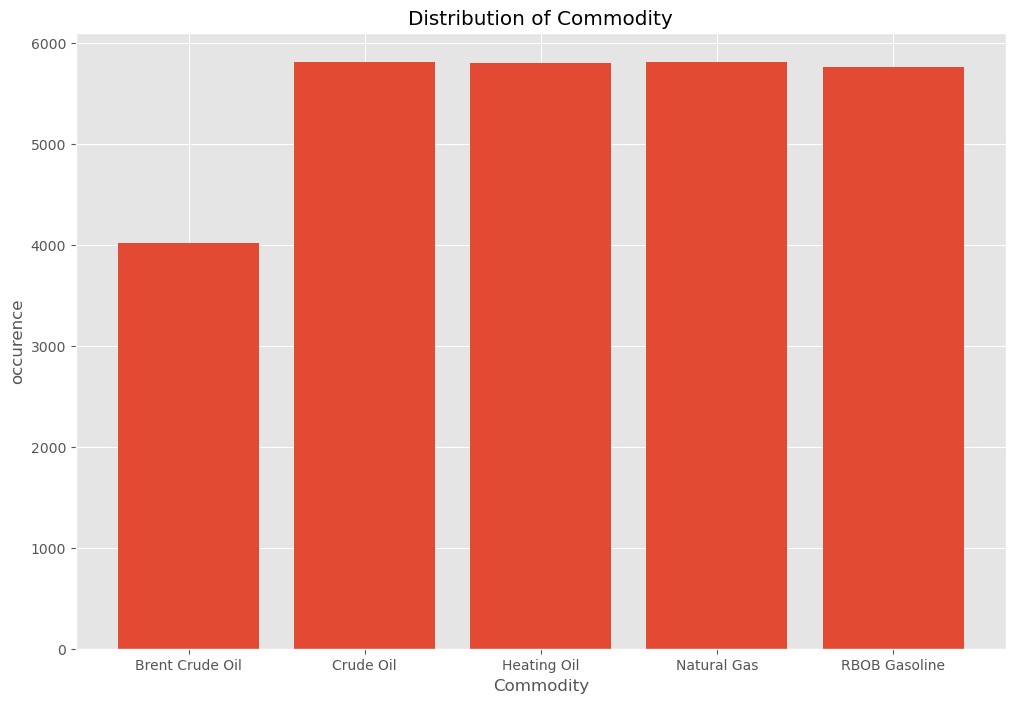

In [158]:
plt.bar(all_fuels_su['commodity'], all_fuels_su['occurence'])
plt.title('Distribution of Commodity')
plt.xlabel('Commodity')
plt.ylabel('occurence')
plt.show()

## Trading volume of each commodity

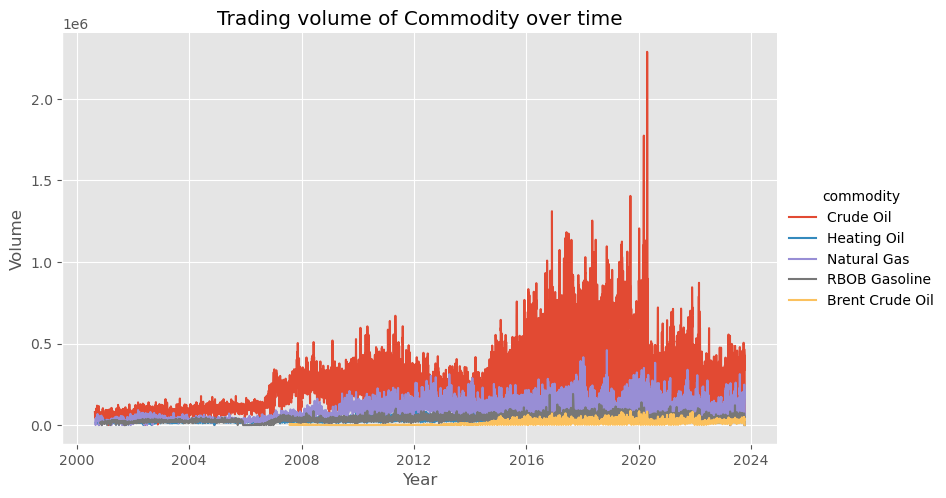

In [182]:
# Convert the 'date' column to a datetime format for better plotting of the data set
all_fuels['date'] = pd.to_datetime(all_fuels['date'])
#plt.plot(all_fuels['date'], all_fuels['volume'])
#all_fuels.plot(x='date',y='volume')
sns.relplot(data=all_fuels, x='date', y='volume', hue='commodity', kind = 'line', aspect=1.61)
## plt.show()
plt.title('Trading volume of Commodity over time')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Volume')
plt.show()

## Price trend of commodity over time

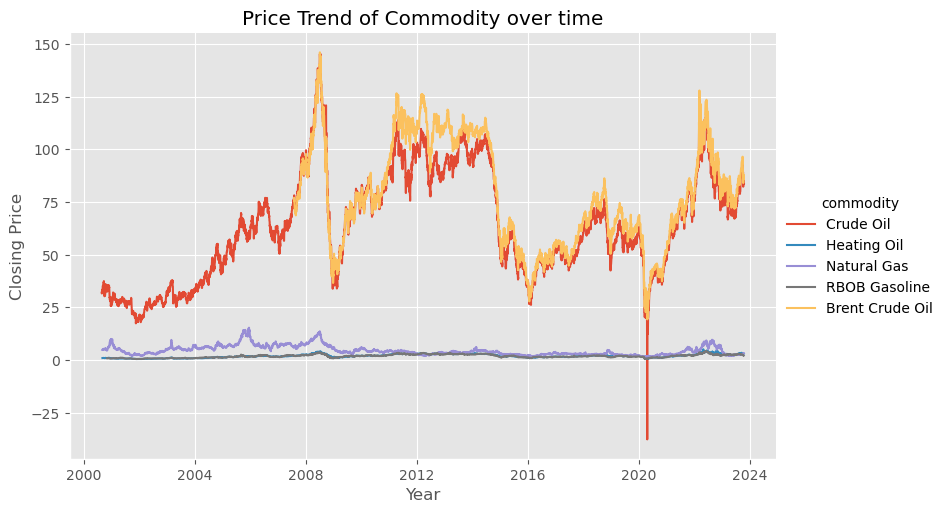

In [413]:
# Convert the 'date' column to a datetime format for better plotting of the data set
all_fuels['date'] = pd.to_datetime(all_fuels['date'])
#plt.plot(all_fuels['date'], all_fuels['volume'])
#all_fuels.plot(x='date',y='volume')
sns.relplot(data=all_fuels, x='date', y='close', hue='commodity', kind = 'line', aspect=1.61)
## plt.show()
plt.title('Price Trend of Commodity over time')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Closing Price')
plt.show()

### There is something what looking into here as the closing price of crude oil falls below 0. 

### Boxplot distribution of prices for each commodity

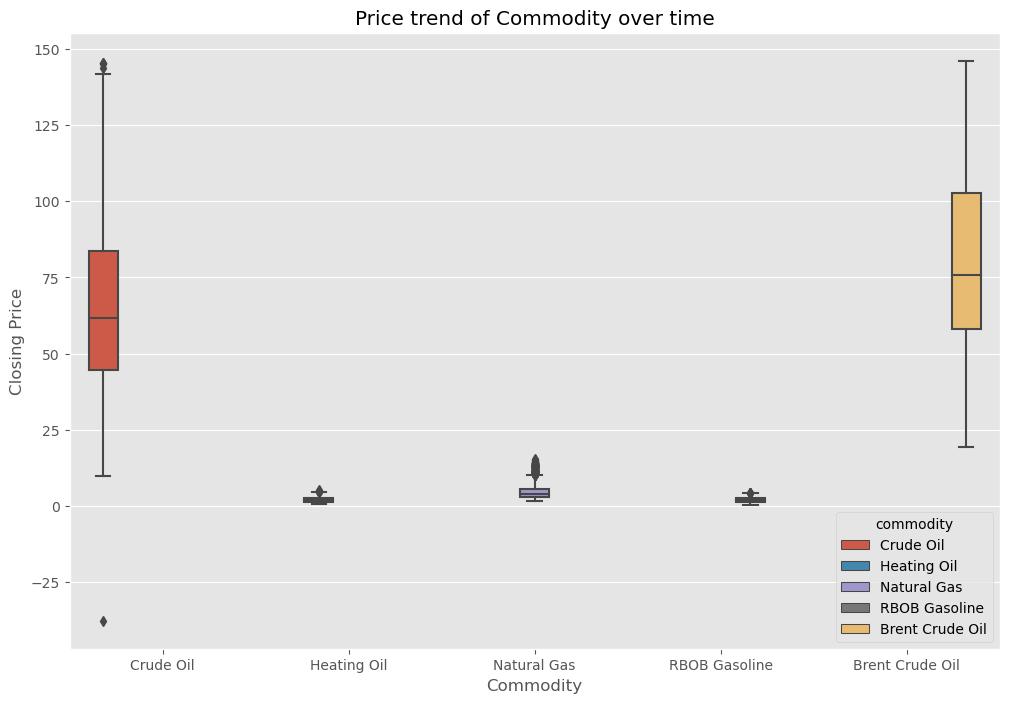

In [248]:
# Convert the 'date' column to a datetime format for better plotting of the data set
all_fuels['date'] = pd.to_datetime(all_fuels['date'])
#plt.plot(all_fuels['date'], all_fuels['volume'])
#all_fuels.plot(x='date',y='volume')
sns.boxplot(data=all_fuels, x='commodity', y='close', hue='commodity')
## plt.show()
plt.title('Price trend of Commodity over time')
plt.xlabel('Commodity')
#plt.xticks(rotation=0)
plt.ylabel('Closing Price')
plt.show()

<Axes: >

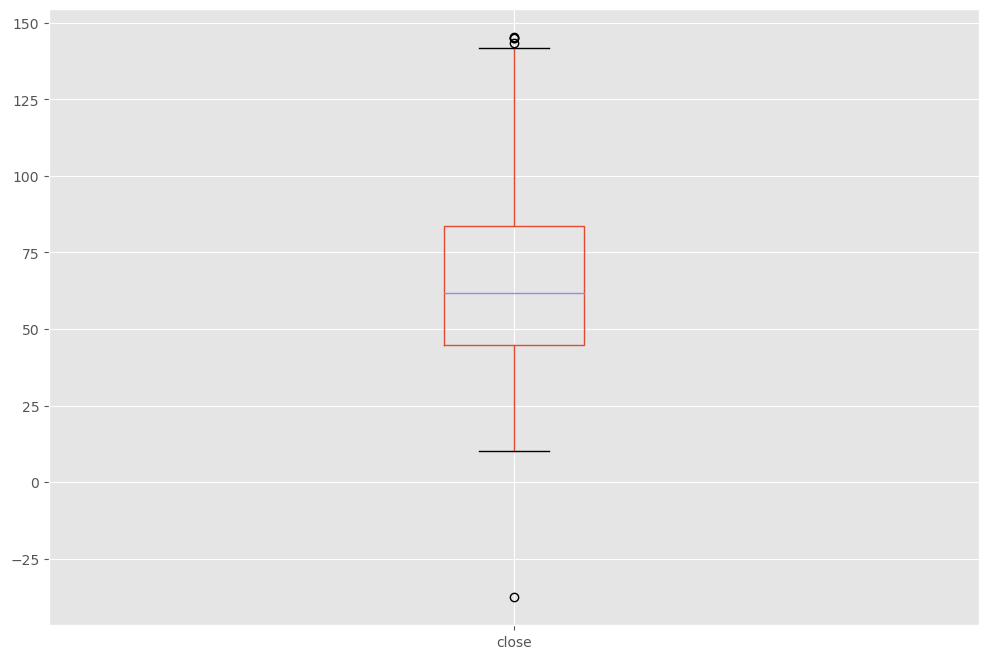

In [199]:
crude_oil.boxplot(column=['close'])

# Summary of preliminary data visualisation
## 1. Crude oil is the most traded commodity based on the preliminary data visualisation.
## 2. Crude oil has some negative closing prices. This is something to look into.
## 3. Brent oil and Crude oil follow the same trend overtime. This is not surprising as brent oil is a derivative of crude oil.
## 4. The market dynamics of each commodity seems unique.

In [211]:
### all_fuels[['ticker']] = all_fuels[['ticker']].astype('object') ## Changing data types

In [214]:
crude_oil

,open,high,low,close,volume
date,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
...,...,...,...,...,...
2023-10-06,82.279999,83.279999,81.500000,82.790001,461139
2023-10-09,85.250000,87.239998,84.669998,86.379997,435037
2023-10-10,86.430000,86.739998,85.120003,85.970001,337654


In [215]:
heating_oil.head()

,open,high,low,close,volume
date,,,,,
2000-09-01,0.985,0.991,0.9705,0.9764,14679
2000-09-05,0.995,0.998,0.9750,0.9797,17365
2000-09-06,0.985,1.000,0.9810,0.9966,18879
2000-09-07,0.990,1.030,0.9880,1.0295,23851
2000-09-08,1.012,1.020,0.9910,0.9949,23189


In [230]:
all_fuels[['col.1']] = df[['col.name1', 'col.name2'..]].astype('data_type')

,ticker,commodity,date,open,high,low,close,volume,change_percent
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0.000000
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,-1.310453
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,1.327854
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,2.558501
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,-0.456336


,ticker,commodity,date,open,high,low,close,volume,change_percent
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0.000000
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,-1.310453
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,1.327854
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,2.558501
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,-0.456336
...,...,...,...,...,...,...,...,...,...
27195,BZ=F,Brent Crude Oil,2023-10-06,84.220001,84.959999,83.449997,84.580002,41254,0.606640
27196,BZ=F,Brent Crude Oil,2023-10-09,86.349998,89.000000,86.070000,88.150002,37096,4.220856
27197,BZ=F,Brent Crude Oil,2023-10-10,88.110001,88.470001,86.919998,87.650002,29704,-0.567215
27198,BZ=F,Brent Crude Oil,2023-10-11,87.750000,88.250000,85.220001,85.820000,37902,-2.087851


In [237]:
all_fuels = all_fuels.drop('change_percent', axis=1)

In [238]:
all_fuels

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
...,...,...,...,...,...,...,...,...
27195,BZ=F,Brent Crude Oil,2023-10-06,84.220001,84.959999,83.449997,84.580002,41254
27196,BZ=F,Brent Crude Oil,2023-10-09,86.349998,89.000000,86.070000,88.150002,37096
27197,BZ=F,Brent Crude Oil,2023-10-10,88.110001,88.470001,86.919998,87.650002,29704
27198,BZ=F,Brent Crude Oil,2023-10-11,87.750000,88.250000,85.220001,85.820000,37902


In [235]:
df = all_fuels

In [236]:
all_fuels

,ticker,commodity,date,open,high,low,close,volume,change_percent
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0.000000
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,-1.310453
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,1.327854
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,2.558501
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,-0.456336
...,...,...,...,...,...,...,...,...,...
27195,BZ=F,Brent Crude Oil,2023-10-06,84.220001,84.959999,83.449997,84.580002,41254,0.606640
27196,BZ=F,Brent Crude Oil,2023-10-09,86.349998,89.000000,86.070000,88.150002,37096,4.220856
27197,BZ=F,Brent Crude Oil,2023-10-10,88.110001,88.470001,86.919998,87.650002,29704,-0.567215
27198,BZ=F,Brent Crude Oil,2023-10-11,87.750000,88.250000,85.220001,85.820000,37902,-2.087851


In [239]:
all.to_csv('modified.csv', index=False)

# Data Cleaning and Exploration

## Daily price percent change over time for all commodities

In [414]:
# Calculate daily price percentage changes (financial returns) for all commodities

all_fuels1 = all_fuels['change_percent'] = all_fuels.groupby('commodity')['close'].pct_change() * 100

# To handle the first row that will have a NaN value after calculating percentage change:
all_fuels['change_percent'].fillna(0, inplace=True)

all_fuels1


0             NaN
1       -1.310453
2        1.327854
3        2.558501
4       -0.456336
           ...   
27195    0.606640
27196    4.220856
27197   -0.567215
27198   -2.087851
27199    0.769056
Name: close, Length: 27200, dtype: float64

In [415]:
all_fuels

,ticker,commodity,date,open,high,low,close,volume,change_percent
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0.000000
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,-1.310453
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,1.327854
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,2.558501
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,-0.456336
...,...,...,...,...,...,...,...,...,...
27195,BZ=F,Brent Crude Oil,2023-10-06,84.220001,84.959999,83.449997,84.580002,41254,0.606640
27196,BZ=F,Brent Crude Oil,2023-10-09,86.349998,89.000000,86.070000,88.150002,37096,4.220856
27197,BZ=F,Brent Crude Oil,2023-10-10,88.110001,88.470001,86.919998,87.650002,29704,-0.567215
27198,BZ=F,Brent Crude Oil,2023-10-11,87.750000,88.250000,85.220001,85.820000,37902,-2.087851


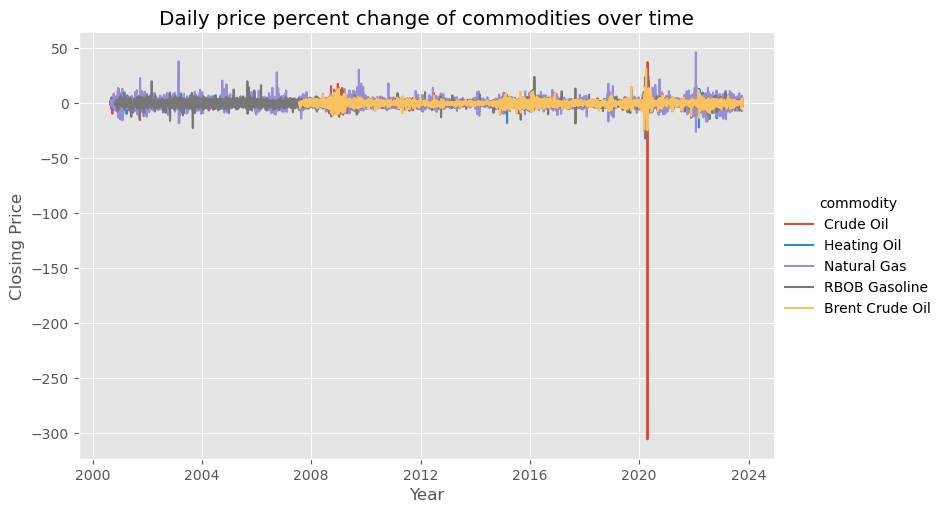

In [303]:
all_fuels['date'] = pd.to_datetime(all_fuels['date'])
#plt.plot(all_fuels['date'], all_fuels['volume'])
#all_fuels.plot(x='date',y='volume')
sns.relplot(data=all_fuels, x='date', y='change_percent', hue='commodity', kind = 'line', aspect=1.61)
## plt.show()
plt.title('Daily price percent change of commodities over time')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Closing Price')
plt.show()

## Use traces of log scale to visualise the data. 

### This is necessary as the log scale makes comparison easier over time. It is easier to compare values that differ greatly in scale using the log scale.

In [416]:
# Create traces for each commodity
fuel_traces = []

unique_fuels = all_fuels['commodity'].unique()

for fuel in unique_fuels:
    fuel_future = all_fuels[all_fuels['commodity'] == fuel]
    trace = go.Scatter(
        x = fuel_future['date'],
        y = fuel_future['close'],
        mode = 'lines',
        name = fuel
    )
    fuel_traces.append(trace)

layout = go.Layout(
    title = dict(text='Closing Prices of commodity Over Time (Log Scale)', x=0.5, font=dict(size=24, color='black')),
    xaxis = dict(title = 'Date'),
    yaxis = dict(title = 'Closing Price (Log Scale)', type='log'),
    showlegend = True,
    legend = dict(orientation="h", x=0.5, y=-0.2, xanchor='center'),
    paper_bgcolor='rgba(0,0,0,0)',   # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot background
)

fig = go.Figure(data=fuel_traces, layout=layout)
fig.show()

## Volatility of commodities

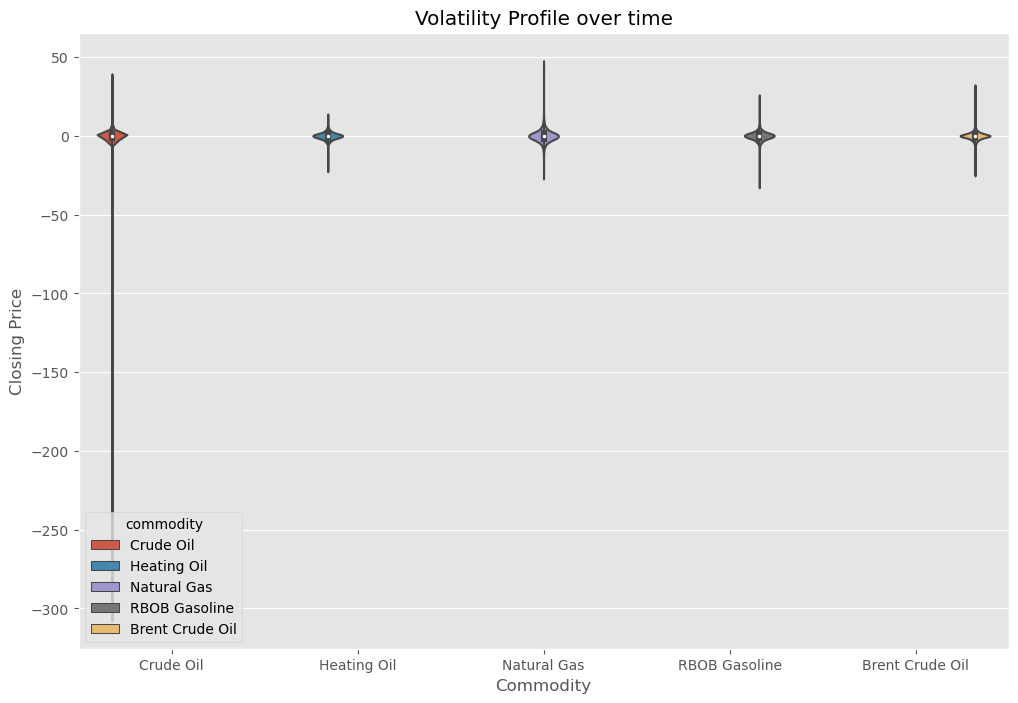

In [309]:
# Convert the 'date' column to a datetime format for better plotting of the data set
all_fuels['date'] = pd.to_datetime(all_fuels['date'])
#plt.plot(all_fuels['date'], all_fuels['volume'])
#all_fuels.plot(x='date',y='volume')
sns.violinplot(data=all_fuels, x='commodity', y='change_percent', hue='commodity')
## plt.show()
plt.title('Volatility Profile over time')
plt.xlabel('Commodity')
#plt.xticks(rotation=0)
plt.ylabel('Closing Price')
plt.show()

### Heating Oil displays the lowest volatility, while crude oil displays the highest volatility largely due to the negative prices in April 2020 (https://www.investopedia.com/articles/investing/100615/will-oil-prices-go-2017.asp#:~:text=The%20May%202020%20futures%20contract,that%20was%20suddenly%20massively%20oversupplied). 

ann_return = all_fuels.groupby('commodity').change_percent.mean()*252
ann_return 
pass

In [417]:
ann_return = all_fuels.groupby('commodity').mean()*252
ann_return
pass

C:\Users\kazee\AppData\Local\Temp\ipykernel_29216\394483674.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [419]:
ann_risk = all_fuels.groupby('commodity').std() * np.sqrt(252)
ann_risk
pass

C:\Users\kazee\AppData\Local\Temp\ipykernel_29216\4159170890.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Pairwise correlations of commodities
## Correlation matrix

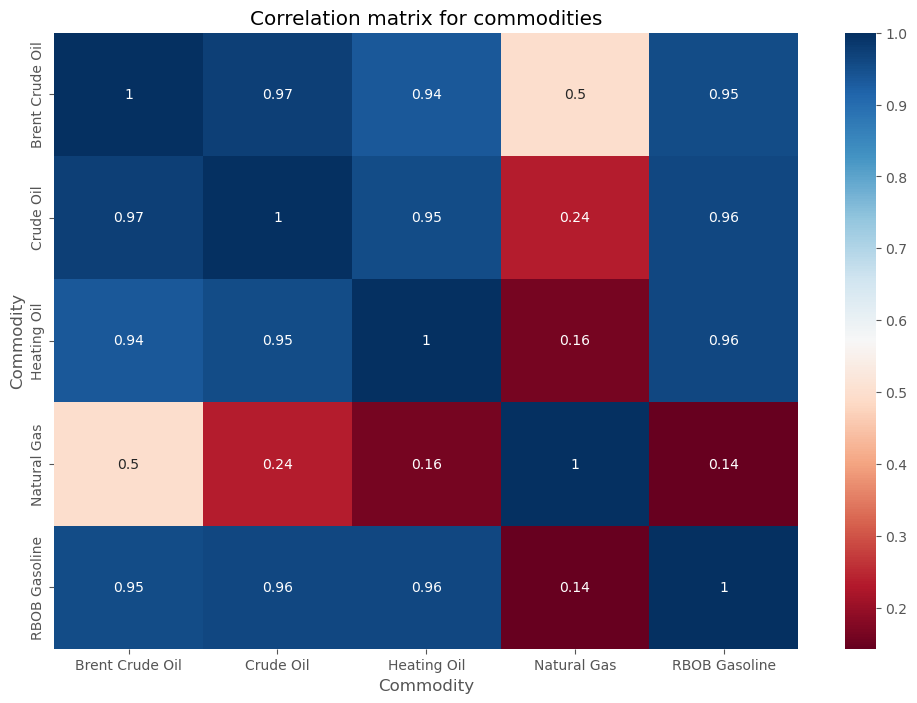

In [340]:
correlation_matrix = all_fuels.pivot_table(index='date', columns='commodity', values='close').corr()

sns.heatmap(correlation_matrix, annot = True, cmap = "RdBu")

plt.title("Correlation matrix for commodities")

plt.xlabel("Commodity")

plt.ylabel("Commodity")

plt.show()

In [356]:
corr_pairs = correlation_matrix.unstack()

print(corr_pairs)

commodity        commodity      
Brent Crude Oil  Brent Crude Oil    1.000000
                 Crude Oil          0.973945
                 Heating Oil        0.936074
                 Natural Gas        0.495622
                 RBOB Gasoline      0.953855
Crude Oil        Brent Crude Oil    0.973945
                 Crude Oil          1.000000
                 Heating Oil        0.953988
                 Natural Gas        0.236500
                 RBOB Gasoline      0.960237
Heating Oil      Brent Crude Oil    0.936074
                 Crude Oil          0.953988
                 Heating Oil        1.000000
                 Natural Gas        0.161457
                 RBOB Gasoline      0.961430
Natural Gas      Brent Crude Oil    0.495622
                 Crude Oil          0.236500
                 Heating Oil        0.161457
                 Natural Gas        1.000000
                 RBOB Gasoline      0.143048
RBOB Gasoline    Brent Crude Oil    0.953855
                 Crude

In [357]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

commodity        commodity      
RBOB Gasoline    Natural Gas        0.143048
Natural Gas      RBOB Gasoline      0.143048
                 Heating Oil        0.161457
Heating Oil      Natural Gas        0.161457
Natural Gas      Crude Oil          0.236500
Crude Oil        Natural Gas        0.236500
Brent Crude Oil  Natural Gas        0.495622
Natural Gas      Brent Crude Oil    0.495622
Heating Oil      Brent Crude Oil    0.936074
Brent Crude Oil  Heating Oil        0.936074
RBOB Gasoline    Brent Crude Oil    0.953855
Brent Crude Oil  RBOB Gasoline      0.953855
Heating Oil      Crude Oil          0.953988
Crude Oil        Heating Oil        0.953988
RBOB Gasoline    Crude Oil          0.960237
Crude Oil        RBOB Gasoline      0.960237
RBOB Gasoline    Heating Oil        0.961430
Heating Oil      RBOB Gasoline      0.961430
Crude Oil        Brent Crude Oil    0.973945
Brent Crude Oil  Crude Oil          0.973945
                 Brent Crude Oil    1.000000
Heating Oil      Heati

In [359]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

commodity        commodity      
Heating Oil      Brent Crude Oil    0.936074
Brent Crude Oil  Heating Oil        0.936074
RBOB Gasoline    Brent Crude Oil    0.953855
Brent Crude Oil  RBOB Gasoline      0.953855
Heating Oil      Crude Oil          0.953988
Crude Oil        Heating Oil        0.953988
RBOB Gasoline    Crude Oil          0.960237
Crude Oil        RBOB Gasoline      0.960237
RBOB Gasoline    Heating Oil        0.961430
Heating Oil      RBOB Gasoline      0.961430
Crude Oil        Brent Crude Oil    0.973945
Brent Crude Oil  Crude Oil          0.973945
                 Brent Crude Oil    1.000000
Heating Oil      Heating Oil        1.000000
Crude Oil        Crude Oil          1.000000
Natural Gas      Natural Gas        1.000000
RBOB Gasoline    RBOB Gasoline      1.000000
dtype: float64


# Conclusions

## 1. The log-scale plot reveals a close relationship between the price trends of Brent oil and crude oil.
## 2. Crude oil exhibits the highest volatility, while heating oil displays the least. The significant volatility in oil prices can be largely attributed to the negative oil prices experienced in April 2020.
## 3. The correlation matrix illustrates strong correlations between all oil derivatives and crude oil, while indicating weak correlations with natural gas. This observation implies that the market dynamics of natural gas differ significantly from those of crude oil.
## 4. The long-term price trends underscore the impact of various global events, including political factors and changes in demand, on the dynamics of commodities.